# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



a       cat
b         1
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b   -0.159484
c   -0.094208
d    0.819095
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    11.196090
2018-11-20 14:45:00     8.555533
2018-11-21 14:45:00    11.053366
2018-11-22 14:45:00    10.812716
Freq: D, dtype: float64 

2018-11-19 14:45:00    11.196090
2018-11-20 14:45:00     8.555533
2018-11-21 14:45:00    11.053366
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,-1.800853,0.719685,-0.013317,-0.834201
2018-11-19 15:45:00,-0.349028,-1.417968,-0.137618,0.022343
2018-11-19 16:45:00,0.612304,1.368774,-0.716314,-2.228578
2018-11-19 17:45:00,-0.198342,-1.221757,1.128233,0.089528
2018-11-19 18:45:00,-0.123448,-0.591479,-0.970426,0.937972
2018-11-19 19:45:00,-0.379924,1.125830,-1.980281,-1.383532
2018-11-19 20:45:00,-0.443190,0.510100,-0.598525,0.379929
2018-11-19 21:45:00,-0.173413,-0.210534,0.699131,-0.849142
2018-11-19 22:45:00,-1.099723,1.224444,-1.366541,-0.187789
2018-11-19 23:45:00,1.550940,-1.168242,1.780544,0.114497


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [12]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,-1.800853,0.719685,-0.013317,-0.834201
2018-11-19 15:45:00,-0.349028,-1.417968,-0.137618,0.022343
2018-11-19 16:45:00,0.612304,1.368774,-0.716314,-2.228578
2018-11-19 17:45:00,-0.198342,-1.221757,1.128233,0.089528
2018-11-19 18:45:00,-0.123448,-0.591479,-0.970426,0.937972


In [14]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-0.443190,0.510100,-0.598525,0.379929
2018-11-19 21:45:00,-0.173413,-0.210534,0.699131,-0.849142
2018-11-19 22:45:00,-1.099723,1.224444,-1.366541,-0.187789
2018-11-19 23:45:00,1.550940,-1.168242,1.780544,0.114497


In [15]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-1.8008528 ,  0.71968547, -0.01331653, -0.83420129],
       [-0.34902792, -1.41796769, -0.13761783,  0.02234346],
       [ 0.61230359,  1.36877426, -0.71631426, -2.22857843],
       [-0.19834205, -1.22175748,  1.12823279,  0.0895285 ],
       [-0.12344775, -0.59147925, -0.97042616,  0.93797216],
       [-0.37992371,  1.12583041, -1.9802812 , -1.38353248],
       [-0.44318957,  0.51010048, -0.59852493,  0.37992944],
       [-0.17341343, -0.21053416,  0.69913087, -0.84914154],
       [-1.09972301,  1.22444435, -1.36654091, -0.18778864],
       [ 1.55093953, -1.16824247,  1.78054448,  0.11449697]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.240468,0.033885,-0.217511,-0.393897
std,0.894537,1.088794,1.158545,0.932567
min,-1.800853,-1.417968,-1.980281,-2.228578
25%,-0.427373,-1.024052,-0.906898,-0.845406
50%,-0.273685,0.149783,-0.368071,-0.082723
75%,-0.135939,1.024294,0.521019,0.108255
max,1.550940,1.368774,1.780544,0.937972


In [19]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,-1.800853,-0.349028,0.612304,-0.198342,-0.123448,-0.379924,-0.443190,-0.173413,-1.099723,1.550940
B,0.719685,-1.417968,1.368774,-1.221757,-0.591479,1.125830,0.510100,-0.210534,1.224444,-1.168242
C,-0.013317,-0.137618,-0.716314,1.128233,-0.970426,-1.980281,-0.598525,0.699131,-1.366541,1.780544
D,-0.834201,0.022343,-2.228578,0.089528,0.937972,-1.383532,0.379929,-0.849142,-0.187789,0.114497


In [20]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2018-11-19 23:45:00,1.550940,-1.168242,1.780544,0.114497
2018-11-19 22:45:00,-1.099723,1.224444,-1.366541,-0.187789
2018-11-19 21:45:00,-0.173413,-0.210534,0.699131,-0.849142
2018-11-19 20:45:00,-0.443190,0.510100,-0.598525,0.379929
2018-11-19 19:45:00,-0.379924,1.125830,-1.980281,-1.383532
2018-11-19 18:45:00,-0.123448,-0.591479,-0.970426,0.937972
2018-11-19 17:45:00,-0.198342,-1.221757,1.128233,0.089528
2018-11-19 16:45:00,0.612304,1.368774,-0.716314,-2.228578
2018-11-19 15:45:00,-0.349028,-1.417968,-0.137618,0.022343
2018-11-19 14:45:00,-1.800853,0.719685,-0.013317,-0.834201


In [21]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 19:45:00,-0.379924,1.125830,-1.980281,-1.383532
2018-11-19 22:45:00,-1.099723,1.224444,-1.366541,-0.187789
2018-11-19 18:45:00,-0.123448,-0.591479,-0.970426,0.937972
2018-11-19 16:45:00,0.612304,1.368774,-0.716314,-2.228578
2018-11-19 20:45:00,-0.443190,0.510100,-0.598525,0.379929
2018-11-19 15:45:00,-0.349028,-1.417968,-0.137618,0.022343
2018-11-19 14:45:00,-1.800853,0.719685,-0.013317,-0.834201
2018-11-19 21:45:00,-0.173413,-0.210534,0.699131,-0.849142
2018-11-19 17:45:00,-0.198342,-1.221757,1.128233,0.089528
2018-11-19 23:45:00,1.550940,-1.168242,1.780544,0.114497


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00   -1.800853
2018-11-19 15:45:00   -0.349028
2018-11-19 16:45:00    0.612304
2018-11-19 17:45:00   -0.198342
2018-11-19 18:45:00   -0.123448
2018-11-19 19:45:00   -0.379924
2018-11-19 20:45:00   -0.443190
2018-11-19 21:45:00   -0.173413
2018-11-19 22:45:00   -1.099723
2018-11-19 23:45:00    1.550940
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -1.800853
2018-11-19 15:45:00   -0.349028
2018-11-19 16:45:00    0.612304
2018-11-19 17:45:00   -0.198342
2018-11-19 18:45:00   -0.123448
2018-11-19 19:45:00   -0.379924
2018-11-19 20:45:00   -0.443190
2018-11-19 21:45:00   -0.173413
2018-11-19 22:45:00   -1.099723
2018-11-19 23:45:00    1.550940
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00 -1.800853  0.719685 -0.013317 -0.834201
2018-11-19 15:45:00 -0.349028 -1.417968 -0.137618  0.022343
2018-11-19 16:45:00  0.612304  1.368774 -0.716314 -2.228578
                            A         B         C         D
2018-11-19 14:45:00 -1.800853  0.719685 -0.013317 -0.834201
2018-11-19 15:45:00 -0.349028 -1.417968 -0.137618  0.022343
2018-11-19 16:45:00  0.612304  1.368774 -0.716314 -2.228578


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -1.800853
B    0.719685
C   -0.013317
D   -0.834201
Name: 2018-11-19 14:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,-1.800853,0.719685
2018-11-19 15:45:00,-0.349028,-1.417968
2018-11-19 16:45:00,0.612304,1.368774
2018-11-19 17:45:00,-0.198342,-1.221757
2018-11-19 18:45:00,-0.123448,-0.591479
2018-11-19 19:45:00,-0.379924,1.125830
2018-11-19 20:45:00,-0.443190,0.510100
2018-11-19 21:45:00,-0.173413,-0.210534
2018-11-19 22:45:00,-1.099723,1.224444
2018-11-19 23:45:00,1.550940,-1.168242


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,-0.123448,-0.591479
2018-11-19 19:45:00,-0.379924,1.125830
2018-11-19 20:45:00,-0.443190,0.510100


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.349027923348
-0.349027923348


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.198342
B   -1.221757
C    1.128233
D    0.089528
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00 -0.198342 -1.221757
2018-11-19 18:45:00 -0.123448 -0.591479


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,-0.349028,-0.137618
2018-11-19 16:45:00,0.612304,-0.716314
2018-11-19 18:45:00,-0.123448,-0.970426


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00 -0.349028 -1.417968 -0.137618  0.022343
2018-11-19 16:45:00  0.612304  1.368774 -0.716314 -2.228578 

                            B         C
2018-11-19 14:45:00  0.719685 -0.013317
2018-11-19 15:45:00 -1.417968 -0.137618
2018-11-19 16:45:00  1.368774 -0.716314
2018-11-19 17:45:00 -1.221757  1.128233
2018-11-19 18:45:00 -0.591479 -0.970426
2018-11-19 19:45:00  1.125830 -1.980281
2018-11-19 20:45:00  0.510100 -0.598525
2018-11-19 21:45:00 -0.210534  0.699131
2018-11-19 22:45:00  1.224444 -1.366541
2018-11-19 23:45:00 -1.168242  1.780544


In [31]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


-1.4179676932795877

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 14:45:00,-1.800853,0.719685,-0.013317,-0.834201
2018-11-19 16:45:00,0.612304,1.368774,-0.716314,-2.228578
2018-11-19 19:45:00,-0.379924,1.125830,-1.980281,-1.383532
2018-11-19 20:45:00,-0.443190,0.510100,-0.598525,0.379929
2018-11-19 22:45:00,-1.099723,1.224444,-1.366541,-0.187789


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,NaN,0.719685,NaN,NaN
2018-11-19 15:45:00,NaN,NaN,NaN,0.022343
2018-11-19 16:45:00,0.612304,1.368774,NaN,NaN
2018-11-19 17:45:00,NaN,NaN,1.128233,0.089528
2018-11-19 18:45:00,NaN,NaN,NaN,0.937972
2018-11-19 19:45:00,NaN,1.125830,NaN,NaN
2018-11-19 20:45:00,NaN,0.510100,NaN,0.379929
2018-11-19 21:45:00,NaN,NaN,0.699131,NaN
2018-11-19 22:45:00,NaN,1.224444,NaN,NaN
2018-11-19 23:45:00,1.550940,NaN,1.780544,0.114497


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df


,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.719685,-0.013317,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.349028,-1.417968,-0.137618,5,0.5,2,0.999962
2018-11-19 16:45:00,0.612304,1.368774,-0.716314,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.198342,-1.221757,1.128233,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.123448,-0.591479,-0.970426,5,2.0,8,0.999391
2018-11-19 19:45:00,-0.379924,1.125830,-1.980281,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.443190,0.510100,-0.598525,5,3.0,12,0.998630
2018-11-19 21:45:00,-0.173413,-0.210534,0.699131,5,3.5,14,0.998135
2018-11-19 22:45:00,-1.099723,1.224444,-1.366541,5,4.0,16,0.997564
2018-11-19 23:45:00,1.550940,-1.168242,1.780544,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.719685,-0.013317,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.349028,-1.417968,-0.137618,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.612304,-1.368774,-0.716314,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.198342,-1.221757,-1.128233,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.123448,-0.591479,-0.970426,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-0.379924,-1.125830,-1.980281,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.443190,-0.510100,-0.598525,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-0.173413,-0.210534,-0.699131,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-1.099723,-1.224444,-1.366541,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-1.550940,-1.168242,-1.780544,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
#df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(labels = ['E prime','cosine'], axis = 1)

,A,B,C,D,E
2018-11-19 14:45:00,0.000000,0.719685,-0.013317,5,0.0
2018-11-19 15:45:00,-0.349028,-1.417968,-0.137618,5,0.5
2018-11-19 16:45:00,0.612304,1.368774,-0.716314,5,1.0
2018-11-19 17:45:00,-0.198342,-1.221757,1.128233,5,1.5
2018-11-19 18:45:00,-0.123448,-0.591479,-0.970426,5,2.0
2018-11-19 19:45:00,-0.379924,1.125830,-1.980281,5,2.5
2018-11-19 20:45:00,-0.443190,0.510100,-0.598525,5,3.0
2018-11-19 21:45:00,-0.173413,-0.210534,0.699131,5,3.5
2018-11-19 22:45:00,-1.099723,1.224444,-1.366541,5,4.0
2018-11-19 23:45:00,1.550940,-1.168242,1.780544,5,4.5


In [38]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.generic:

drop(self, labels, axis=0, level=None, inplace=False, errors='raise')
    Return new object with labels in requested axis removed.
    
    Parameters
    ----------
    labels : single label or list-like
    axis : int or axis name
    level : int or level name, default None
        For MultiIndex
    inplace : bool, default False
        If True, do operation inplace and return None.
    errors : {'ignore', 'raise'}, default 'raise'
        If 'ignore', suppress error and existing labels are dropped.
    
        .. versionadded:: 0.16.1
    
    Returns
    -------
    dropped : type of caller



In [39]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.719685,-0.013317,5,0.0,0,1.000000
2018-11-19 19:45:00,-0.379924,1.125830,-1.980281,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.443190,0.510100,-0.598525,5,3.0,12,0.998630
2018-11-19 21:45:00,-0.173413,-0.210534,0.699131,5,3.5,14,0.998135
2018-11-19 22:45:00,-1.099723,1.224444,-1.366541,5,4.0,16,0.997564
2018-11-19 23:45:00,1.550940,-1.168242,1.780544,5,4.5,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.719685,-0.013317,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.349028,-1.417968,-0.137618,5,0.5,2,0.999962
2018-11-19 16:45:00,0.612304,1.368774,-0.716314,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.198342,-1.221757,1.128233,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.123448,-0.591479,-0.970426,5,2.0,8,0.999391
2018-11-19 19:45:00,-0.379924,1.125830,-1.980281,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.443190,0.510100,-0.598525,5,3.0,12,0.998630
2018-11-19 21:45:00,-0.173413,-0.210534,0.699131,5,3.5,14,0.998135
2018-11-19 23:45:00,1.550940,-1.168242,1.780544,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0].drop(['A', 'B', 'C'], axis = 1)
df_wNan

,D,E,E prime,cosine
2018-11-19 14:45:00,5,NaN,NaN,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,D,E,E prime,cosine
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


In [43]:
# getting a mask
#df_wNan.isna()
df_wNan.notna()

AttributeError: 'DataFrame' object has no attribute 'notna'

In [44]:
#help(pd.DataFrame)

In [45]:
# filling missing data
df_wNan.fillna(value=0)

,D,E,E prime,cosine
2018-11-19 14:45:00,5,0.0,0.0,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [46]:
df_wNan.fillna(method='pad')

,D,E,E prime,cosine
2018-11-19 14:45:00,5,NaN,NaN,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [47]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.060382
B          0.033885
C         -0.217511
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.958053
2018-11-19 15:45:00    0.942193
2018-11-19 16:45:00    1.752087
2018-11-19 17:45:00    1.886827
2018-11-19 18:45:00    2.044863
2018-11-19 19:45:00    2.466382
2018-11-19 20:45:00    2.923859
2018-11-19 21:45:00    3.401903
2018-11-19 22:45:00    3.536535
2018-11-19 23:45:00    4.380023
Freq: H, dtype: float64 



In [48]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.719685,-0.013317,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.349028,-0.698282,-0.150934,10,0.5,2,1.999962
2018-11-19 16:45:00,0.263276,0.670492,-0.867249,15,1.5,6,2.999810
2018-11-19 17:45:00,0.064934,-0.551265,0.260984,20,3.0,12,3.999467
2018-11-19 18:45:00,-0.058514,-1.142745,-0.709442,25,5.0,20,4.998858
2018-11-19 19:45:00,-0.438438,-0.016914,-2.689723,30,7.5,30,5.997906
2018-11-19 20:45:00,-0.881627,0.493186,-3.288248,35,10.5,42,6.996536
2018-11-19 21:45:00,-1.055041,0.282652,-2.589117,40,14.0,56,7.994670
2018-11-19 22:45:00,-2.154764,1.507096,-3.955658,45,18.0,72,8.992234
2018-11-19 23:45:00,-0.603824,0.338854,-2.175114,50,22.5,90,9.989152


In [49]:
df.apply(lambda x: x.max() - x.min())

A           2.650663
B           2.786742
C           3.760826
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [50]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00    0.719685
2018-11-19 15:45:00   -1.766996
2018-11-19 16:45:00    1.981078
2018-11-19 17:45:00   -1.420100
2018-11-19 18:45:00   -0.714927
2018-11-19 19:45:00    0.745907
2018-11-19 20:45:00    0.066911
2018-11-19 21:45:00   -0.383948
2018-11-19 22:45:00    0.124721
2018-11-19 23:45:00    0.382697
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [51]:
file_name="../data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's know do some operations among (elements of) columns

In [52]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [53]:
# the old slooow way
def conversion(data):
    result=[]
    
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [54]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [55]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.041306,1.579454,0.264156,0.118489
1,0.849651,-0.483953,-0.006162,-1.059156
2,-0.713505,-0.124944,-0.143546,-0.935690
3,0.486886,0.918540,-0.778598,-0.539813
4,0.005798,-0.336809,-1.628106,-0.261712
5,-0.247623,0.239326,-0.614468,1.600573
6,0.258485,-0.378734,0.868715,0.709149
7,-0.612262,0.743085,0.233030,1.180861
8,0.863361,0.230973,-0.479648,-0.222873
9,-0.070570,-0.749815,0.526482,-0.986585


In [56]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.041306  1.579454  0.264156  0.118489
 1  0.849651 -0.483953 -0.006162 -1.059156
 2 -0.713505 -0.124944 -0.143546 -0.935690,
           0         1         2         3
 3  0.486886  0.918540 -0.778598 -0.539813
 4  0.005798 -0.336809 -1.628106 -0.261712
 5 -0.247623  0.239326 -0.614468  1.600573
 6  0.258485 -0.378734  0.868715  0.709149,
           0         1         2         3
 7 -0.612262  0.743085  0.233030  1.180861
 8  0.863361  0.230973 -0.479648 -0.222873
 9 -0.070570 -0.749815  0.526482 -0.986585]

In [57]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.041306,1.579454,0.264156,0.118489
1,0.849651,-0.483953,-0.006162,-1.059156
2,-0.713505,-0.124944,-0.143546,-0.935690
3,0.486886,0.918540,-0.778598,-0.539813
4,0.005798,-0.336809,-1.628106,-0.261712
5,-0.247623,0.239326,-0.614468,1.600573
6,0.258485,-0.378734,0.868715,0.709149
7,-0.612262,0.743085,0.233030,1.180861
8,0.863361,0.230973,-0.479648,-0.222873
9,-0.070570,-0.749815,0.526482,-0.986585


In [58]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,0.041306,1.579454,0.264156,0.118489
1,0.849651,-0.483953,-0.006162,-1.059156
2,-0.713505,-0.124944,-0.143546,-0.935690
3,0.486886,0.918540,-0.778598,-0.539813
4,0.005798,-0.336809,-1.628106,-0.261712
5,-0.247623,0.239326,-0.614468,1.600573
6,0.258485,-0.378734,0.868715,0.709149
7,-0.612262,0.743085,0.233030,1.180861
8,0.863361,0.230973,-0.479648,-0.222873
9,-0.070570,-0.749815,0.526482,-0.986585


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [59]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [60]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.186413,0.108633
1,bar,one,-0.967984,2.775636
2,foo,two,-0.531791,-0.720709
3,bar,three,0.702961,1.488421
4,foo,two,0.331271,0.592590
5,bar,two,-0.336171,1.462062
6,foo,one,0.048203,0.895563
7,foo,three,-0.296753,-1.125093


In [61]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.601194,5.726119
foo,-0.635482,-0.249016


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [62]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.631541
       two       1.161366
baz    one       0.238513
       two       0.525450
foo    one      -1.766281
       two      -0.731420
qux    one       0.012193
       two      -1.010216
dtype: float64


In [63]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.967984  2.775636
    three  0.702961  1.488421
    two   -0.336171  1.462062
foo one   -0.138209  1.004195
    three -0.296753 -1.125093
    two   -0.200520 -0.128119

In [64]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.967984
            D    2.775636
     three  C    0.702961
            D    1.488421
     two    C   -0.336171
            D    1.462062
foo  one    C   -0.138209
            D    1.004195
     three  C   -0.296753
            D   -1.125093
     two    C   -0.200520
            D   -0.128119
dtype: float64

## Plotting

Just a preview, more on the next lab class!

In [65]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

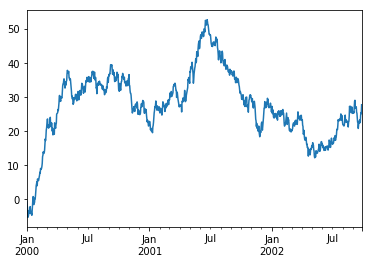

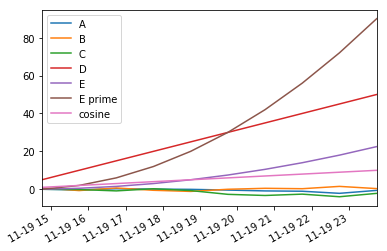

In [66]:
import matplotlib.pyplot as plt
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')
plt.show()